## Uncertainty Quantifications - Monte Carlo Simulations

---

This notebook will quantify log k values for various species using a Monte Carlo method with lower and upper bounds

#### Set up initial parameters

see https://github.com/A-440Hz/ML4SCM/blob/main/Python-PHREEQC%20IO.ipynb for reference

In [11]:
import os 
import numpy.random
from writeIOphreeqc import*

TDBfile = 'llnl'
outfile = 'output.sel' 
pars    = ['!kHfo_sO-!','!kHfo_sOUO3H!','!kHfo_sOUO3-!','!kHfo_sOUO2(CO3)2-3!','!kHfo_sOUO2+!','!khfo_souo2(c!']
n_obs   = 140
pqcpath = 'C:/Users/htzen/Desktop/phreeqc-3.7.0-15749-x64/bin/phreeqc'

#### Set up and verify uncertainty bounds

How should I figure out the increment?
- go by a set amount until reached higher bound? 
- divide by a set number so there are an even number of runs per parameter?

Set initial *values*

In [2]:
lower = [0, 0, 0, 0, 0, 0]
upper = [9, 9, 9, 9, 9, 9]


def verify(pars, low, upp):
    """
    checks length and bounds of lists for correct format
    """
    if len(pars) == len(low) & len(low) == len(upp):
        
        if all([low[i] <= upp[i] for i in range(len(pars))]):
            return True
        print("error: listed bounds are inconsistent")
        return False
    
    print("error: lists are different lenghts")
    return False

print(verify(pars, lower, upper))

values = lower

True


#### Generate values from probablilty distributions

how many iterations?

I don't quite understand the template so I have it this way for now

In [40]:
num_iterations = 9
obs_all = []

def get_random_values(values, lower, upper):
    for i in range(len(values)):
        values[i] = numpy.random.uniform(lower[i], upper[i])

# def get_next_values(values, lower, upper):
#     # increment each element in values    
#     for i in range(len(values)):
#         values[i] += (upper[i] - lower[i]) / num_iterations

for itr in range(num_iterations):
    # generate output
    get_random_values(values, lower, upper)

    writeInput(TDBfile, pars, values)
    os.popen(pqcpath+' input.txt output.txt llnl.txt')
    obs = readOutput(outfile, n_obs)
    obs_all.append(obs)

    # increment values
    

1.7713099427501398
8.005506480815761
4.2169482363152815


[1.7713099427501398, 8.005506480815761, 4.2169482363152815]

In [4]:
for i in obs_all:
    print(i)
    
# todo: make a graph

[9.9851e-07, 9.4679e-07, 3.1765e-07, 3.442e-08, 2.2222e-09, 2.1739e-10, 3.1412e-11, 6.7279e-12, 6.0847e-12, 1.5616e-11, 2.4734e-10, 1.9329e-08, 1e-06, 9.9865e-07, 9.5443e-07, 3.084e-07, 3.5017e-08, 2.1232e-09, 2.2899e-10, 3.1203e-11, 6.7733e-12, 5.6434e-12, 1.3859e-11, 2.1031e-10, 1.6799e-08, 7.4173e-06, 2.2142e-06, 2.3628e-08, 1.7437e-09, 4.6823e-11, 7.4037e-05, 2.6471e-05, 1.4e-06, 4.9536e-07, 1.7755e-07, 6.1209e-08, 3.6861e-09, 7.1471e-06, 8.7914e-07, 4.228e-08, 6.2934e-09, 3.4075e-09, 3.2069e-10, 8.2919e-11, 3.1603e-12, 7.5673e-13, 7.912e-13, 8.9798e-13, 9.3804e-12, 1.2578e-11, 9.9919e-05, 8.3785e-05, 2.7753e-05, 7.3696e-06, 2.5113e-06, 1.0122e-06, 2.1543e-07, 1.2195e-07, 2.4776e-09, 1.5523e-09, 7.7202e-10, 3.9523e-11, 9.2146e-11, 2.0299e-07, 2.0251e-07, 1.7686e-07, 2.5483e-08, 1.7428e-10, 1.1851e-11, 3.7119e-12, 2.2309e-12, 1.6191e-12, 1.071e-12, 7.8465e-13, 5.4254e-13, 3.4936e-13, 3.2824e-13, 1.225e-12, 2.1758e-11, 2.7581e-10, 7.9328e-10, 2.603e-09, 3.5518e-09, 2.04e-07, 2.0375e-

### Remaining Questions
---

- what is meant by "parameter" in the slides template? Is it referring to the column selected in readOutput or something else?

- what is a good way to select an increment for values?

- is there a way to properly close a phreeqc instance once I start it with os.popen? I feel like the current way I'm using this for loops leaves a lot of things running after it finishes but I'm not sure whether this is the culprit yet:

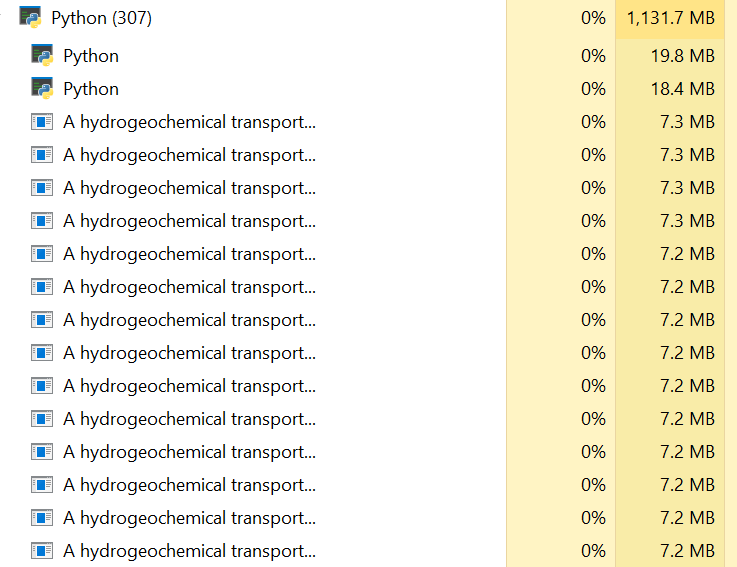

- in hindsight it seems like they close automatically once they successfully run. Maybe I just tried running too many instances at once. Either that or I magically fixed everything by adding f.close() to the writeIOphreeqc functions

In [7]:
import re

# write thermodynamic database with given parameters                                                                                                                                           
def writeInput(filename, pars, values):
    # filename: thermodynamic data base name
    # pars: parameter names
    # values: parameter values
    f = open(filename+'.tpl', 'r')
    c = f.readline()
    c = f.read()

    # Replace the target string                                                                                                                                  
    for i in range(len(pars)):
        c = c.replace(pars[i], str(values[i]))

    # Write the file out again                                                                                                                                   
    with open(filename+'.txt', 'w') as f:
        f.write(c)

    # Close the file
    f.close()
        
# read PHREEQC output
def readOutput(filename, n):
    # filename: output file name
    # n: number of observations
    f = open(filename, 'r')
    c = f.readline()
    res = re.split(r"[\s,\"]+",c)
    print(res)
    obs = []
    for i in range(n):
        c = f.readline()
        c = f.readline()
        result = re.split(r"[\s,\"]+",c)
        print(result)
        obs.append(float(result[3]))
    f.close()
    return obs

# read observation/measured values
def readobs(filename,n):
    f = open(filename, 'r')
    obs = []
    for i in range(n):
        c = f.readline()
        print(c)
        obs.append(float(c[1:(len(c)-1)]))
    f.close()
    return obs

In [8]:
readOutput("op.sel", 2)

['', 'sim', 'state', 'U', 'm_Hfo_sOUO3H', 'm_Hfo_sOUO3-', 'm_Hfo_sOUO2(CO3)2-3', 'm_Hfo_sOUO2+', 'm_Hfo_sOH', 'm_Hfo_sO-', '']
['', '4', 'react', '2.5958e-08', '2.7444e-10', '9.7377e-07', '3.5454e-22', '7.7612e-14', '7.4675e-15', '8.2314e-06', '']
['', '5', 'react', '2.3788e-09', '8.2972e-11', '9.9754e-07', '4.1701e-21', '6.9247e-15', '2.1975e-15', '8.2078e-06', '']


[2.5958e-08, 2.3788e-09]

In [31]:
f = open("op.sel")

In [32]:
while f.readline() != "":
    print(True)
print(False)
f.close()

True
True
True
True
True
False
